### Retail Price Optimization

#### Import Necessary Library

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

#### Import the dataset

In [38]:
df=pd.read_csv("D:/repository/Retail_Price_Optimization/retail_price.csv")
print(df.head(3))

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1  comp_2  ps2        fp2  \
0                   2  ...    89.9  3.9  15.011897   215.0  4.4   8.760000   
1                   2  ...    89.9  3.9  14.769216   209.0  4.4  21.322000   
2                   2  ...    89.9  3.9  13.993833   205.0  4.4  22.195932   

   comp_3  ps3        fp3  lag_price  
0   45.95  4.0  15.100000      45.90  
1   45.95  

In [39]:
df=df.drop(columns="product_id")

#### EDA

#### Check for missing value

In [40]:
df.isnull().sum()
#CONLUSION: There is no missing value in the dataset

product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [41]:
print(df.duplicated().sum().sum())

0


### EDA

#### Discriptive analysis

In [42]:
print(df.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       676 non-null    object 
 1   month_year                  676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend                     676 non

### Feature Engineering

#### Add a month_year column to the dataset

In [46]:
df["month_year"]=pd.to_datetime(df["month_year"],format='%d-%m-%Y').dt.strftime("%Y-%m")
print(df["month_year"])

0      2017-05
1      2017-06
2      2017-07
3      2017-08
4      2017-09
        ...   
671    2017-05
672    2017-06
673    2017-07
674    2017-08
675    2017-09
Name: month_year, Length: 676, dtype: object


#### Add new log_transformation of the following column

In [47]:
df["total_price_log"]=np.log(df["total_price"])
df["unit_price_log"]=np.log(df["unit_price"])
df["qty_log"]=np.log(df["qty"])

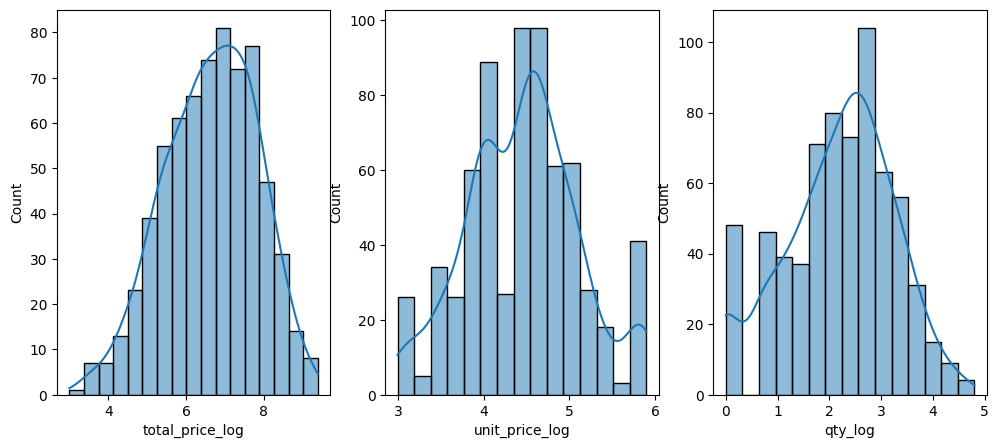

In [59]:
fig,axes=plt.subplots(1,3,figsize=(12,5))
axes=axes.flatten()
feature=["total_price_log","unit_price_log","qty_log"]
for i in range(len(feature)):
    sns.histplot(df[feature[i]],kde=True,ax=axes[i])


#### Categorical and Numerical Variable

In [60]:
categorical=df.select_dtypes(include=["object"]).columns
print(categorical)
numerical=df.select_dtypes(exclude=["object"]).columns
print(numerical)

Index(['product_category_name', 'month_year'], dtype='object')
Index(['qty', 'total_price', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price', 'total_price_log', 'unit_price_log', 'qty_log'],
      dtype='object')


### Data Visualization

#### Heat Map

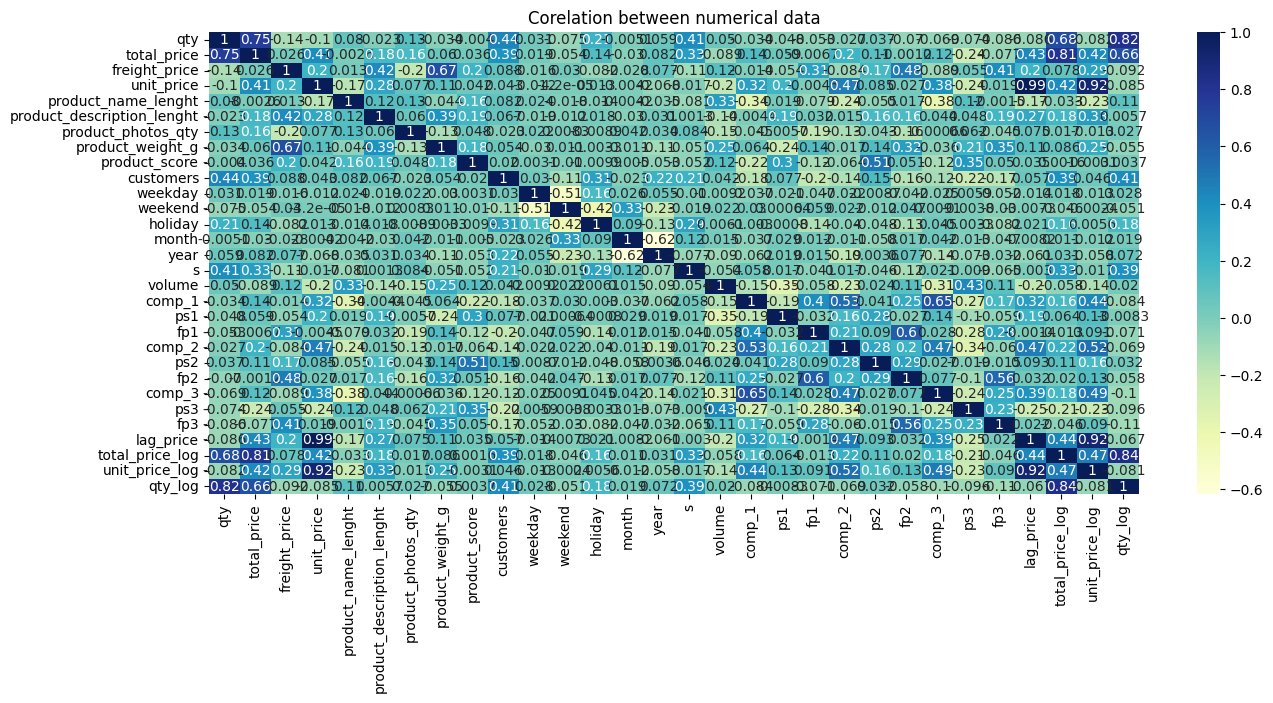

In [62]:
def heatmap(df,title):
    plt.figure(figsize=(15,6))
    #sns.set(font_scale=1)
    sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
    plt.title(title)
    plt.show()
    return

heatmap(df[numerical],"Corelation between numerical data")

In [63]:
print("hii")

hii
